<a href="https://colab.research.google.com/github/Dwarkamoye/Python-CS5590-490-0001/blob/master/LAB-2/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorboardcolab import *
from __future__ import print_function
import os
from datetime import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://b1c37253.ngrok.io


In [0]:
df = pd.read_csv('Boston.csv')
kc_data = pd.DataFrame(df, columns=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","lstat","medv"
])
label_col = 'medv'
#print(kc_data.describe())

In [0]:
kc_x_train, kc_x_valid, kc_y_train, kc_y_valid = train_test_split(kc_data.iloc[:,0:12], kc_data.iloc[:,12],
                                                    test_size=0.3, random_state=87)

In [0]:
np.random.seed(155)
def norm_stats(df1, df2):
    dfs = df1.append(df2)
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)

def z_score(col, stats):
    m, M, mu, s = stats
    df2 = pd.DataFrame()
    for c in col.columns:
        df2[c] = (col[c]-mu[c])/s[c]
    return df2

In [0]:
stats = norm_stats(kc_x_train, kc_x_valid)
arr_x_train = np.array(z_score(kc_x_train, stats))
arr_y_train = np.array(kc_y_train)
arr_x_valid = np.array(z_score(kc_x_valid, stats))
arr_y_valid = np.array(kc_y_valid)
print('Training shape:', arr_x_train.shape)
print('ddd',arr_y_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (354, 12)
ddd (354,)
Training samples:  354
Validation samples:  152


In [0]:
#basic_model_1 created model with some parameters
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

In [0]:
#basic_model_2 is different from basic_model_1 but doing the same task with different structure
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    tensorboard = TensorBoard(log_dir="logs/final1",histogram_freq=0, write_graph=True, write_images=True)
    return(t_model)

In [0]:
model = basic_model_2(arr_x_train.shape[1], 1)

model.summary()
epochs = 20
batch_size =32
history = model.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2, # Change it to 2, if wished to observe execution
    validation_data=(arr_x_valid, arr_y_valid),callbacks=[TensorBoardColabCallback(tbc)])


W0719 15:47:14.938543 140221285611392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



[-0.41348033 -0.48772236 -1.2660231  -0.27259857 -0.57613394 -0.18753407
  0.00800464 -0.24497801 -0.75292215 -1.27835435 -0.30309415  0.06965751]
[-0.39593474  0.04877224 -0.47665354 -0.27259857 -0.26515405 -0.9312059
  1.11749449  1.08719646 -0.52300145 -0.57751897 -1.50523663  2.42177359]


W0719 15:47:14.960170 140221285611392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 15:47:14.963876 140221285611392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 15:47:14.985656 140221285611392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 15:47:14.997551 140221285611392 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 7,391
Trainable params: 7,391
Non-trainable params: 0
_________________________________________________________________


W0719 15:47:15.989384 140221285611392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0719 15:47:16.218097 140221285611392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensorboardcolab/core.py:49: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0719 15:47:16.368262 140221285611392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.



Train on 354 samples, validate on 152 samples
Epoch 1/20
 - 0s - loss: 566.6062 - mean_absolute_error: 22.2027 - val_loss: 608.3525 - val_mean_absolute_error: 22.6805
Epoch 2/20
 - 0s - loss: 528.7477 - mean_absolute_error: 21.3770 - val_loss: 565.6583 - val_mean_absolute_error: 21.8198
Epoch 3/20
 - 0s - loss: 477.7568 - mean_absolute_error: 20.2430 - val_loss: 494.6309 - val_mean_absolute_error: 20.3106
Epoch 4/20
 - 0s - loss: 389.5493 - mean_absolute_error: 18.0931 - val_loss: 379.5554 - val_mean_absolute_error: 17.5483
Epoch 5/20
 - 0s - loss: 273.3565 - mean_absolute_error: 14.5424 - val_loss: 235.7865 - val_mean_absolute_error: 12.8868
Epoch 6/20
 - 0s - loss: 165.5180 - mean_absolute_error: 10.0015 - val_loss: 141.1532 - val_mean_absolute_error: 9.4015
Epoch 7/20
 - 0s - loss: 115.7906 - mean_absolute_error: 8.2733 - val_loss: 107.4078 - val_mean_absolute_error: 7.9671
Epoch 8/20
 - 0s - loss: 89.7745 - mean_absolute_error: 7.2452 - val_loss: 89.6832 - val_mean_absolute_error: 

In [0]:
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4))
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  3.3518 , Train Loss:  21.1424
Val MAE:  3.9189 , Val Loss:  30.1117


In [0]:
keras_callbacks = [
    ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2),
    ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0),
    TensorBoard(log_dir='./model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
    EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

In [0]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)

    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

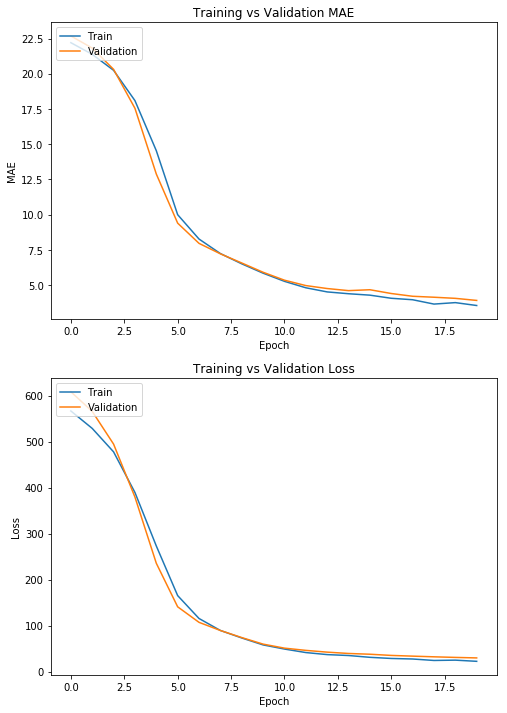

In [0]:
plot_hist(history.history, xsize=8, ysize=12)
